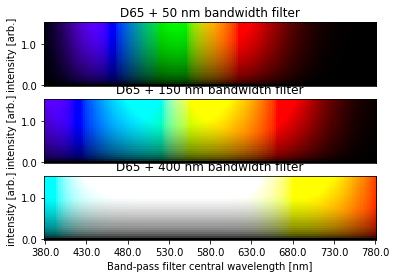

In [1]:
import dtmm.color as dc
import matplotlib.pyplot as plt
import numpy as np

nw = 161 #number of wavelengths
ni = 31 #number of intensities

ws = np.linspace(380,780,nw)

#color matching function
cmf = dc.load_tcmf(ws)

im = np.zeros(shape = (ni,nw,3))

subplots = (311,312,313)
intensities = np.linspace(0,1.5,ni)

for k,delta in enumerate((50,150,400)):
    plt.subplot(subplots[k])
    plt.title("D65 + {} nm bandwidth filter".format(delta))
    
    for i,w in enumerate(ws):
        for j, intensity in enumerate(intensities):
            s = np.zeros(shape = (nw,))
            mask = (ws < w + delta/2.) & (ws > w - delta/2.)
            s[mask] = intensity #make band-pass specter
            im[j,i] = dc.specter2color(s,cmf)
        
    plt.imshow(im, origin = "lower")

    plt.xticks([]) 
    plt.yticks(range(ni)[::20],intensities[::20])
    plt.ylabel("intensity [arb.]")
    
plt.xticks(range(nw)[::20],ws[::20])    
plt.xlabel("Band-pass filter central wavelength [nm]")
plt.show()

